In [1]:
# Step 1: Importing the required libraries
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Step 2: Loading and preparing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Step 3: Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Step 4: Defining the class name for CIFAR-10 images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

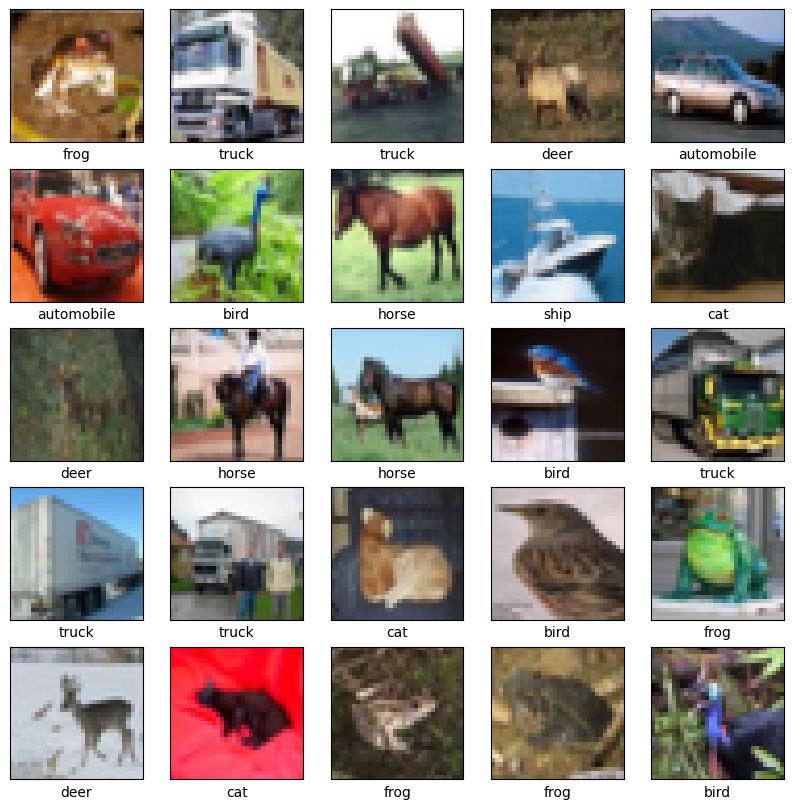

In [5]:
# Step 5: Visualising a few training images from CIFAR-10 dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
# Step 6: Bulding the Convolutional Neural Network (CNN) model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ]
)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Printing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 8: Compiling the CNN model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
# Step 9: Training the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3655 - loss: 1.7175 - val_accuracy: 0.5555 - val_loss: 1.2508
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5886 - loss: 1.1608 - val_accuracy: 0.6381 - val_loss: 1.0335
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6532 - loss: 0.9896 - val_accuracy: 0.6693 - val_loss: 0.9372
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6914 - loss: 0.8772 - val_accuracy: 0.6829 - val_loss: 0.9251
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7192 - loss: 0.7937 - val_accuracy: 0.6973 - val_loss: 0.8650
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7459 - loss: 0.7234 - val_accuracy: 0.6891 - val_loss: 0.8958
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7633 - loss: 0.6733 - val_accuracy: 0.7190 - val_loss: 0.8290
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7787 - loss

In [11]:
# Step 10: Evaluating the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7033 - loss: 0.9123

Test accuracy: 0.7032999992370605


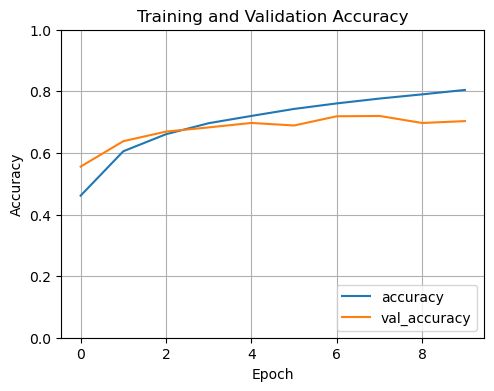

In [13]:
# Step 11: Visualising the training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

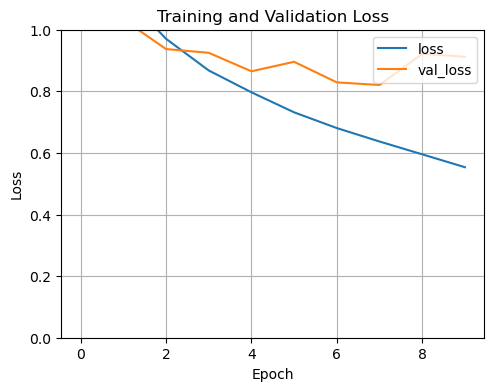

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

## Hyperparameter Tunning

In [16]:
from keras_tuner import RandomSearch

Trial 10 Complete [00h 20m 41s]
val_accuracy: 0.6534000039100647

Best val_accuracy So Far: 0.7095999717712402
Total elapsed time: 02h 00m 58s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.3266 - loss: 1.8185 - val_accuracy: 0.5486 - val_loss: 1.2553
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.5469 - loss: 1.2650 - val_accuracy: 0.5993 - val_loss: 1.1247
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6002 - loss: 1.1292 - val_accuracy: 0.6397 - val_loss: 1.0130
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6388 - loss: 1.0269 - val_accuracy: 0.6451 - val_loss: 1.0112
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6650 - loss: 0.9525 - val_accuracy: 0.6650 - val_loss: 0.9494
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6882 - loss: 0.8863 - val_accuracy: 0.6640 - val_loss: 0.9559
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accurac

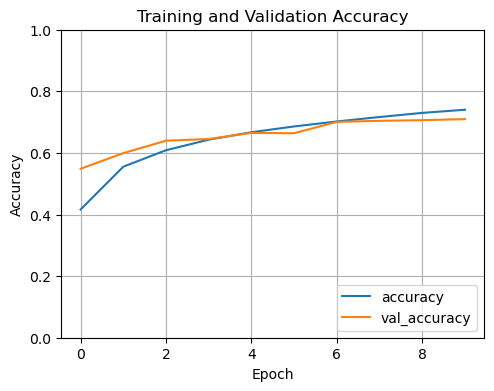

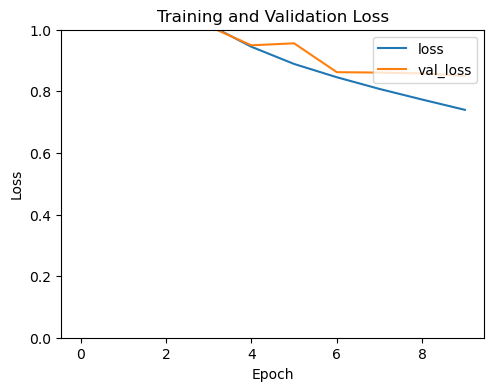

In [17]:
# Step 12: Creating function that will build the model with hyperparameters
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.Flatten()) # Flattening the outpot from convolutional layers to prepare for the dense layers
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', 0, 0.5, step=0.1)))
    model.add(layers.Dense(10)) # Output layer with 10 units

    # Choose the optimizer and the loss function
    #optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

# Step 13: Instantiating the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)

# Step 14: Searching for the best hyperparameters with using defined tuner
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 15: Getting the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Step 16: Building the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 17: Plotting the accuracy and loss of the model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()




In [18]:
print("Best hyperparameters: ", best_hps.values)

Best hyperparameters:  {'conv1_units': 32, 'conv2_units': 128, 'conv3_units': 48, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.001}


Reloading Tuner from my_dir/cifar10_tunning/tuner0.json
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3281 - loss: 1.8048 - val_accuracy: 0.4580 - val_loss: 1.4748
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4962 - loss: 1.3749 - val_accuracy: 0.4847 - val_loss: 1.4187
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5434 - loss: 1.2694 - val_accuracy: 0.5372 - val_loss: 1.2843
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5681 - loss: 1.1942 - val_accuracy: 0.5487 - val_loss: 1.2593
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5933 - loss: 1.1242 - val_accuracy: 0.5622 - val_loss: 1.2355
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6082 - loss: 1.0832 - val_accuracy: 0.5521 - val_loss: 1.2652
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6234 - loss: 1.0418 - val_accuracy: 0.5635 - val_loss: 1.2506
Epoch 8/10
1563/1563 ━━━━━━

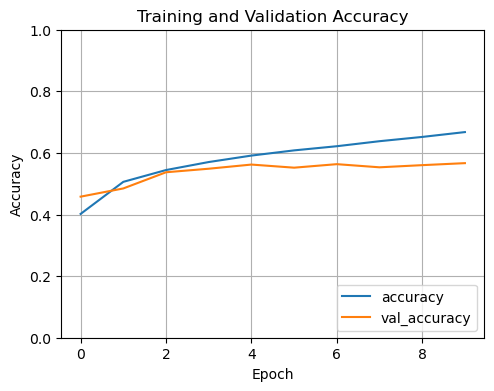

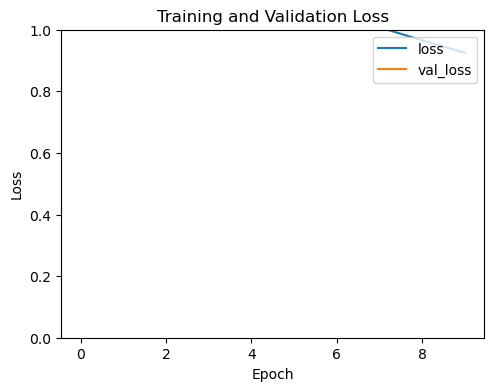

Best hyperparameters:  {'conv1_units': 32, 'conv2_units': 128, 'conv3_units': 48, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'conv_layers': 1, 'conv_0_units': 32, 'dense_layers': 1, 'dense_0_units': 32, 'dropout_0': 0.0}


In [21]:
def build_new_model(hp):
    model = models.Sequential()

    # Tune the number of Convolutional layers (1,2 or 3)
    for i in range(hp.Int('conv_layers', 1, 3)):
        if(i == 0):
            model.add(layers.Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
        #model.add(layers.Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
        #model.add(layers.MaxPooling2D((2, 2)))
        else:
            model.add(layers.Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
            model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten()) # Flattening the outpot from convolutional layers to prepare for the dense layers

    # Tune the number of Dense layers (1,2 or 3)
    for i in range(hp.Int('dense_layers', 1, 3)):
        model.add(layers.Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=128, step=16), activation='relu'))
    
    model.add(layers.Dropout(hp.Float('dropout_' + str(i), 0, 0.5, step=0.1)))

# The last dense layer
    model.add(layers.Dense(10, activation='softmax')) 
    optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

# Define the tuner
tuner = RandomSearch(
    build_new_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)

tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

print("Best hyperparameters: ", best_hps.values)